In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
tesla=pd.read_csv('interpolated_tesla_df.csv',index_col='Date')

In [3]:
tesla.head()

Value
Date                
2010-06-29  1.592667
2010-06-30  1.588667
2010-07-01  1.464000
2010-07-02  1.280000
2010-07-03  1.228500

## Artificial Neural Network - Univariate Stock Price Forecasting

### Univariate Time Series Forecasting
- Using ANN (Artificial Neural Network)
- Using RNNs (Recurrent Neural Network)
- Using LSTMs (Long Short Memory Network)
- Using CNNs (Convolution Neural Network)
- Using Encoder-Decoder Model
- Using Encoder-Decoder with Attention Mechanism

In [4]:
data=tesla.values
data.shape

(3946, 1)

In [5]:
# Separate train and test data
train_length = int(len(data) * 0.9)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  3551
Shape of Train and Test data:  (3551, 1) (395, 1)


In [6]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (3551, 1) (395, 1)


In [7]:
# split a univariate sequence into supervised learning [Input and Output]
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [9]:
from statsmodels.tsa.stattools import pacf

pacf_value = pacf(data, nlags=10)

lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [10]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3548, 2) (3548,)
Shape of test_X and test_y:  (392, 2) (392,)


In [11]:
print(test_data[:5])            # original data
for x in range(len(train_X[:5])):
    print(test_X[x], test_y[x], )            # trainX and trainY after lookback

[[28.50933266]
 [28.50200081]
 [28.65222295]
 [28.80244509]
 [28.95266724]]
[28.50933266 28.50200081] 28.65222295125325
[28.50200081 28.65222295] 28.80244509379069
[28.65222295 28.80244509] 28.952667236328125
[28.80244509 28.95266724] 33.66666793823242
[28.95266724 33.66666794] 35.95000076293945


In [12]:
# Fix random seed for reproducibility
# Thes seed value helps in initilizing random weights and biases to the neural network.  
np.random.seed(7)

In [13]:
# ML libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [14]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation='linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 64)                192       
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [15]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 59.6800 - val_loss: 43.3821
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2842 - val_loss: 1.5387
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1751 - val_loss: 1.5512
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1610 - val_loss: 1.5424
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1607 - val_loss: 1.5365
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1581 - val_loss: 1.5283
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 1.5217
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 1.5154
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 1.5098
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 1.5047
Epoch 1

Epoch 83/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0993 - val_loss: 1.2556
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0991 - val_loss: 1.2536
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0990 - val_loss: 1.2516
Epoch 86/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0988 - val_loss: 1.2496
Epoch 87/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0987 - val_loss: 1.2476
Epoch 88/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0985 - val_loss: 1.2457
Epoch 89/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0984 - val_loss: 1.2438
Epoch 90/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0983 - val_loss: 1.2419
Epoch 91/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0982 - val_loss: 1.2401
Epoch 92/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0981 - val_loss: 1.2382


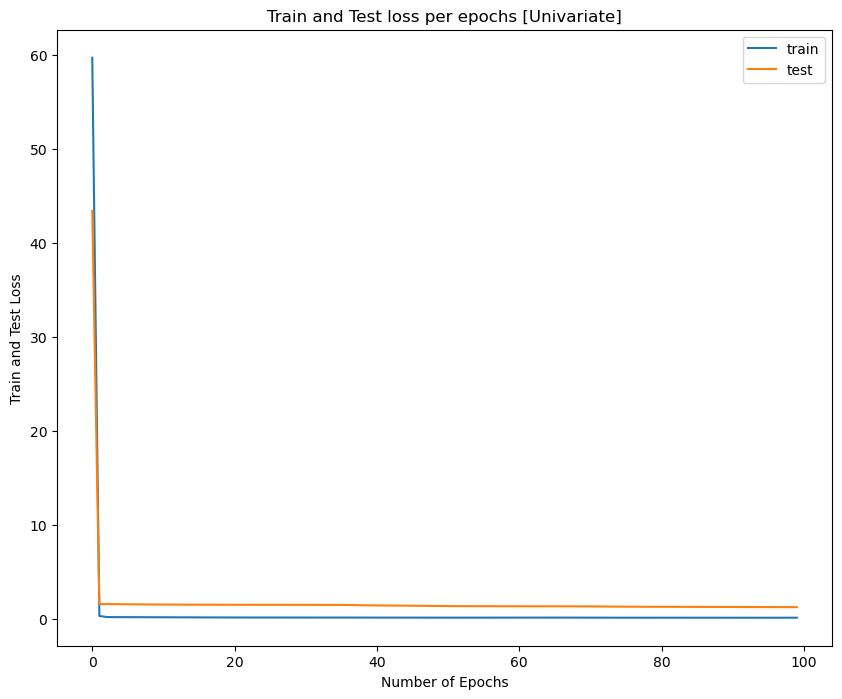

In [16]:
# plot history
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

In [17]:
# Make prediction
testPredict = model.predict(test_X)

13/13 [==============================] - 0s 835us/step


In [18]:
testPredict[:5]

array([[28.53351 ],
       [28.667253],
       [28.817366],
       [28.96748 ],
       [33.150887]], dtype=float32)

In [19]:
# calculate root mean squared error
# RMSE between actual and predicted cpu values
import math
from sklearn.metrics import mean_squared_error

testScore = math.sqrt(mean_squared_error(test_y[:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.44 RMSE


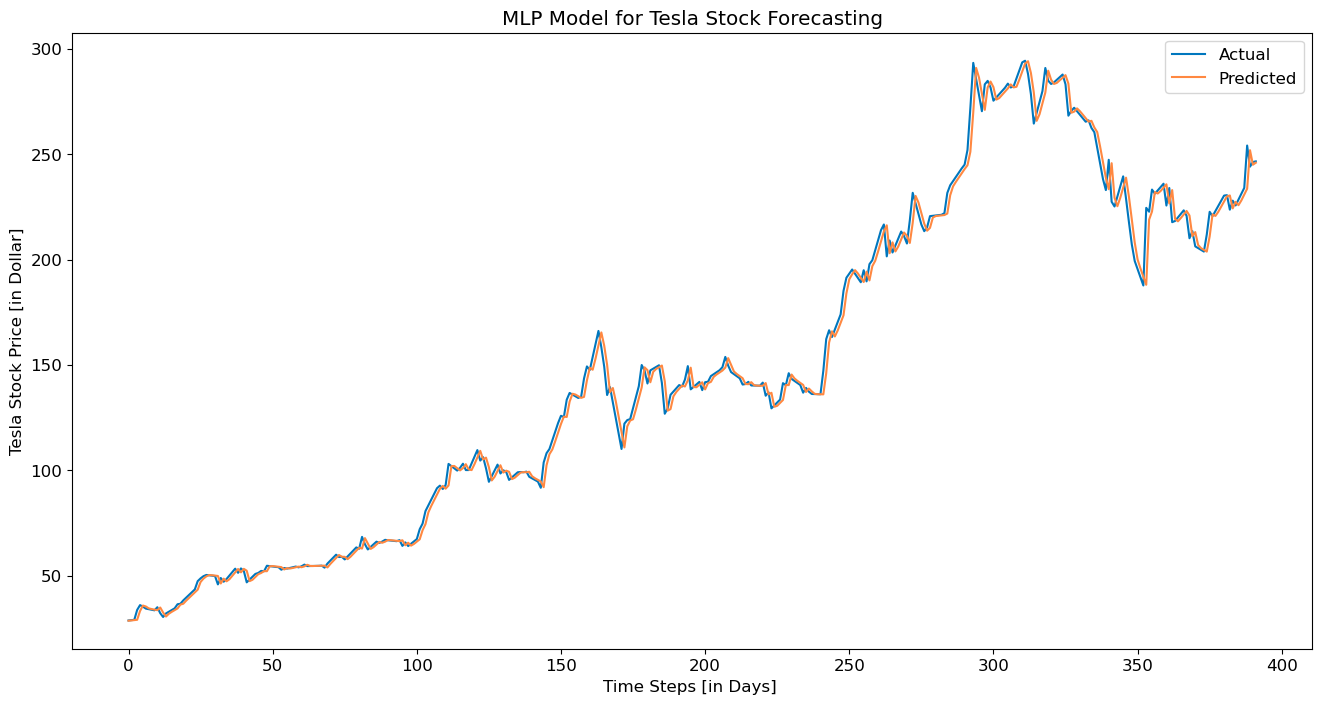

In [20]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be',label = 'Actual')
plt.plot(testPredict[:,0], '#ff8841',label = 'Predicted')
plt.title('MLP Model for Tesla Stock Forecasting')
plt.ylabel('Tesla Stock Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

##  RNN - Recurrent Neural Network

In [21]:
data = tesla.values
print('Shape of data: ', data.shape)

Shape of data:  (3946, 1)


In [22]:
# Separate train and test data
train_length = int(len(data) * 0.9)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  3551
Shape of Train and Test data:  3551 395


In [23]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [24]:
lag = 2  # Empirically we have choosen
n_features = 1

In [25]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [26]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3549, 2, 1) (3549, 1)
Shape of test_X and test_y:  (393, 2, 1) (393, 1)


In [27]:
#6.5 Reshape train_X and test_X to 3-Dimension

train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [28]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3549, 2, 1) (3549, 1)
Shape of test_X and test_y:  (393, 2, 1) (393, 1)


In [29]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense

In [30]:
# define model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [31]:
# As you are trying to use function decorator in TF 2.0, 
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [32]:
# fit model

history = model.fit(train_X, train_y, epochs = 50, batch_size=64, verbose=1, validation_split= 0.1)

Epoch 1/50
50/50 [==============================] - 1s 20ms/step - loss: 67.6717 - val_loss: 4.5950
Epoch 2/50
50/50 [==============================] - 1s 17ms/step - loss: 0.4678 - val_loss: 2.2844
Epoch 3/50
50/50 [==============================] - 1s 14ms/step - loss: 0.1765 - val_loss: 2.2253
Epoch 4/50
50/50 [==============================] - 1s 15ms/step - loss: 0.1758 - val_loss: 2.2384
Epoch 5/50
50/50 [==============================] - 1s 16ms/step - loss: 0.1746 - val_loss: 2.2312
Epoch 6/50
50/50 [==============================] - 1s 15ms/step - loss: 0.1737 - val_loss: 2.2207
Epoch 7/50
50/50 [==============================] - 1s 18ms/step - loss: 0.1728 - val_loss: 2.2120
Epoch 8/50
50/50 [==============================] - 1s 16ms/step - loss: 0.1718 - val_loss: 2.2160
Epoch 9/50
50/50 [==============================] - 1s 15ms/step - loss: 0.1720 - val_loss: 2.2151
Epoch 10/50
50/50 [==============================] - 1s 17ms/step - loss: 0.1707 - val_loss: 2.2058
Epoch 11

In [33]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

13/13 [==============================] - 0s 5ms/step
Shape of train and test predict:  (3549, 1) (393, 1)


In [34]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.5644195859241914 6.790865450762557


In [35]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

# y_true are the actual values, y_pred are the predicted values
mae_train_score = mean_absolute_error(train_y, train_predict)
mae_test_score = mean_absolute_error(test_y, test_predict)

print('Train and Test MAE: ',mae_train_score,mae_test_score)

Train and Test MAE:  0.2777390383023706 4.6100650767940285


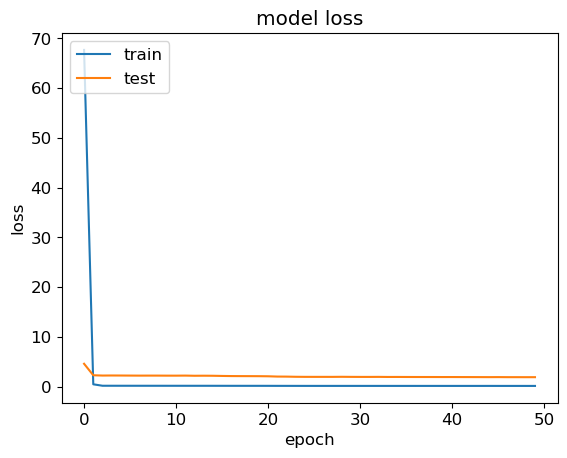

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Hyper Parameter Tuning

In [39]:
'''
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define the model architecture
def create_model(neurons=10, lr=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, activation='relu', return_sequences=False, input_shape=(2, 1)))
    model.add(Dense(1))
    optimizer = Adam(lr=lr)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Create the KerasRegressor object
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'neurons': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(train_X, train_y)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", np.sqrt(-grid_result.best_score_))
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasRegressor\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense\nfrom keras.optimizers import Adam\n\n# Define the model architecture\ndef create_model(neurons=10, lr=0.01):\n    model = Sequential()\n    model.add(SimpleRNN(neurons, activation=\'relu\', return_sequences=False, input_shape=(2, 1)))\n    model.add(Dense(1))\n    optimizer = Adam(lr=lr)\n    model.compile(loss=\'mse\', optimizer=optimizer)\n    return model\n\n# Create the KerasRegressor object\nmodel = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=0)\n\n# Define the hyperparameters to tune\nparam_grid = {\n    \'neurons\': [32, 64, 128],\n    \'lr\': [0.01, 0.001, 0.0001]\n}\n\n# Create the GridSearchCV object\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=3, verbose=1)\n\n# Fit the GridSearchCV object to the data\ngrid_resul

In [ ]:
#results_df

In [ ]:
'''
# Create a DataFrame to store the grid search results
results_df = pd.DataFrame(grid_result.cv_results_)

# Extract the columns of interest
columns = ['param_neurons', 'param_lr', 'mean_test_score', 'std_test_score']
results_df = results_df[columns]

# Pivot the table to make it easier to visualize
table = pd.pivot_table(results_df, values='mean_test_score', index='param_neurons', columns='param_lr')

# Plot the results as a heatmap
plt.figure(figsize=(8,6))
plt.imshow(table, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(table.columns)), table.columns)
plt.yticks(range(len(table.index)), table.index)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Neurons')
plt.title('Hyperparameter Tuning Results (Mean Test Score)')
plt.show()

In [ ]:
'''
# Extract the hyperparameter values and test RMSE scores from the grid search results
neurons = [32, 64, 128]
learning_rates = [0.01, 0.001, 0.0001]
test_rmse_scores = np.sqrt(-grid_result.cv_results_['mean_test_score'])

neurons_32=test_rmse_scores[[0, 3, 6]]
neurons_64=test_rmse_scores[[1, 4, 7]]
neurons_128=test_rmse_scores[[2, 5, 8]]

# Create the line plot
plt.plot(learning_rates, neurons_32, marker='o', label='neurons=32')
plt.plot(learning_rates, neurons_64, marker='o', label='neurons=64')
plt.plot(learning_rates, neurons_128, marker='o', label='neurons=128')

# Add labels and legend
plt.xlabel('Learning rate')
plt.ylabel('Abosolute value of Mean Test Score')
plt.title('Root Mean Squared Error')
plt.legend()

# Show the plot
plt.show()

In [ ]:
'''
model = Sequential()
model.add(SimpleRNN(32, activation='relu', return_sequences=False, input_shape=(2, 1)))
model.add(Dense(1))
adam = Adam(lr=0.01)
model.compile(optimizer=adam, loss='mse')

In [ ]:
#history = model.fit(train_X, train_y, epochs=50, batch_size=64, verbose=1, validation_split= 0.1)

In [ ]:
#test_loss = model.evaluate(test_X, test_y)

In [ ]:
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
'''
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

In [ ]:
'''
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

In [ ]:
'''
#Mean Absolute Error (MAE)

mae_train_score = mean_absolute_error(train_y, train_predict)
mae_test_score = mean_absolute_error(test_y, test_predict)

print('Train and Test MAE: ',mae_train_score,mae_test_score)

In [ ]:
'''
#Mean Absolute Percentage Error (MAPE):
mape_train = np.mean(np.abs((train_y-train_predict) / train_y)) * 100
mape_test = np.mean(np.abs((test_y-test_predict) / test_y)) * 100

print("MAPE Train and Test:", mape_train,mape_test)

In [ ]:
''''
# R-squared (R^2) Value:
from sklearn.metrics import r2_score

r2_train= r2_score(train_y, train_predict)
r2_test= r2_score(test_y, test_predict)

print("R-squared (R^2) Value Train and Test:", r2_train,r2_test)

In [ ]:
'''
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the RNN model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

# Print the model summary
model.summary()

## Plotting the predition vs real values

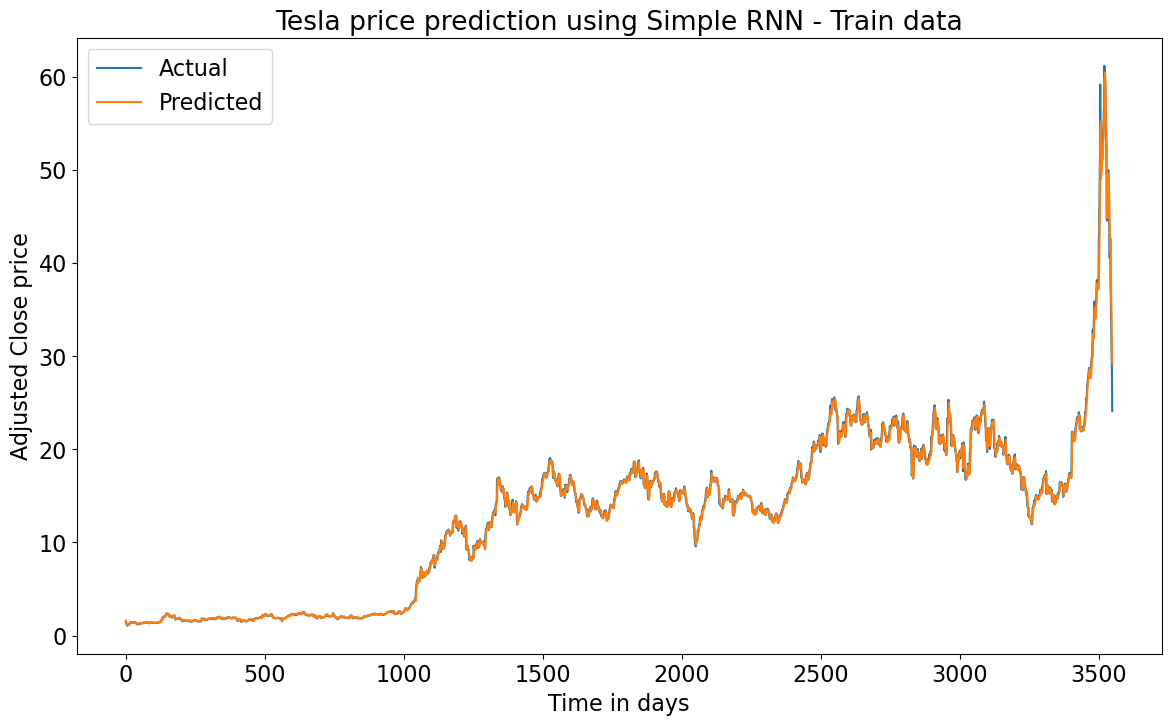

In [40]:
#Train Data
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(train_y, label = 'Actual')
plt.plot(train_predict, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('Adjusted Close price')
plt.title('Tesla price prediction using Simple RNN - Train data')
plt.legend()
plt.show()

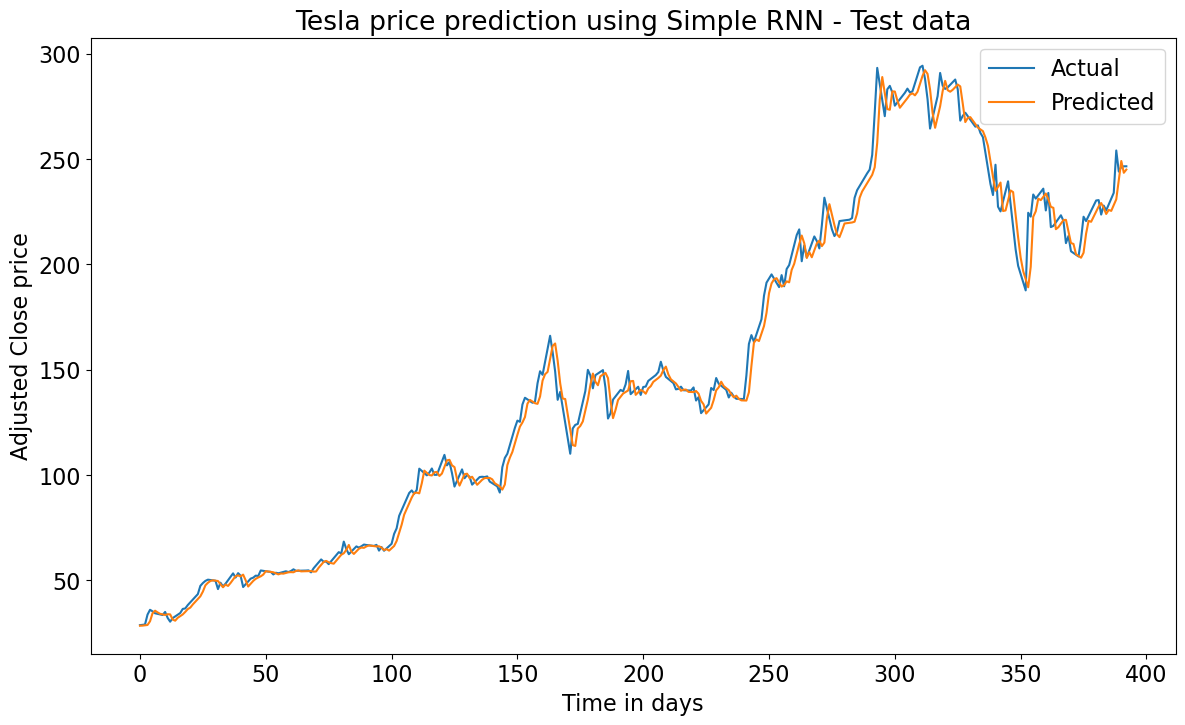

In [41]:
# Test Data
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('Adjusted Close price')
plt.title('Tesla price prediction using Simple RNN - Test data')
plt.legend()
plt.show()

In [42]:
train_residuals=(train_y.flatten()-train_predict.flatten())

In [43]:
test_residuals=(test_y.flatten()-test_predict.flatten())

In [47]:
train_predict.shape, train_residuals.shape,train_data.shape

((3551,), (3551,), (3551, 1))

In [45]:
train_predict=np.insert(train_predict, 0, [np.nan, np.nan])

In [46]:
train_residuals=np.insert(train_residuals, 0, [np.nan, np.nan])

In [48]:
test_residuals=np.insert(test_residuals, 0, [np.nan, np.nan])

In [49]:
test_predict=np.insert(test_predict, 0, [np.nan, np.nan])

In [51]:
predict = np.concatenate((train_predict, test_predict), axis=0)
residuals=np.concatenate((train_residuals, test_residuals), axis=0)

In [52]:
predict.shape, residuals.shape, tesla.shape

((3946,), (3946,), (3946, 1))

In [53]:
tesla['predict']=predict
tesla['residuals']=residuals

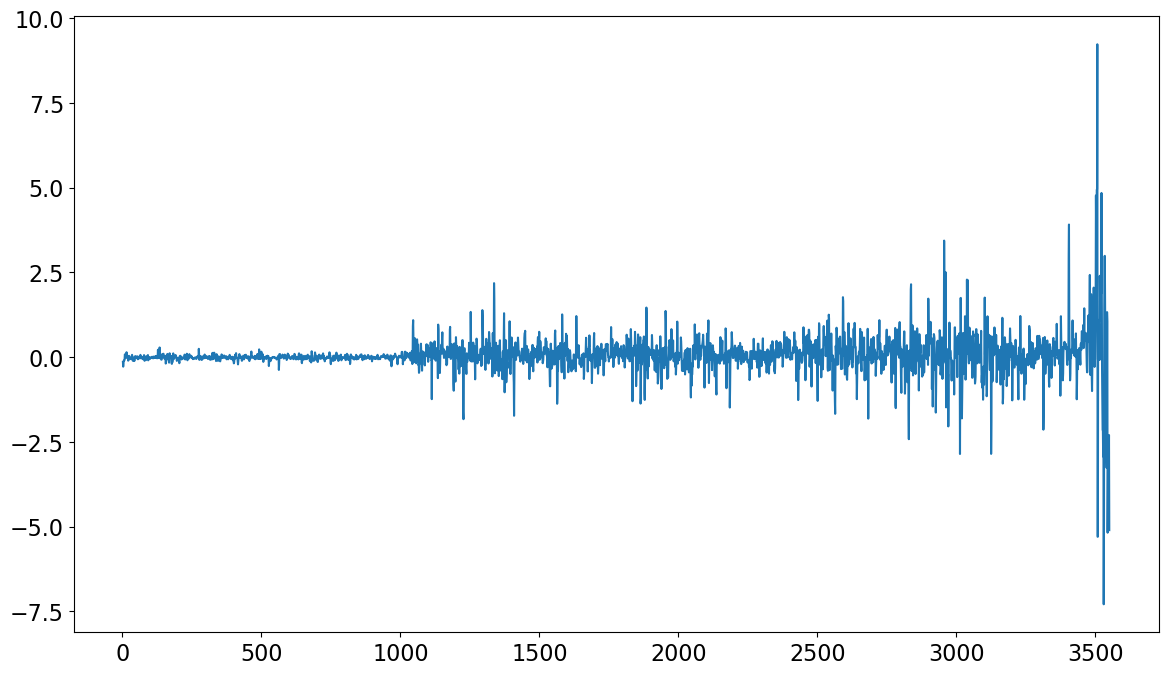

In [55]:
plt.plot(train_residuals)

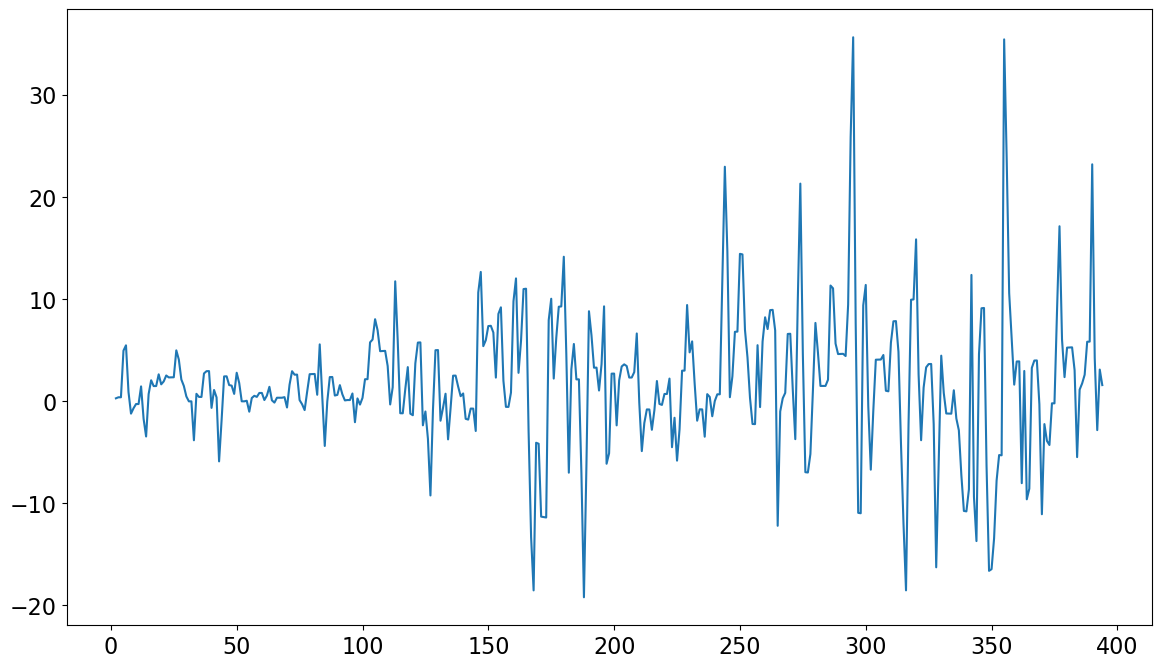

In [54]:
plt.plot(test_residuals)

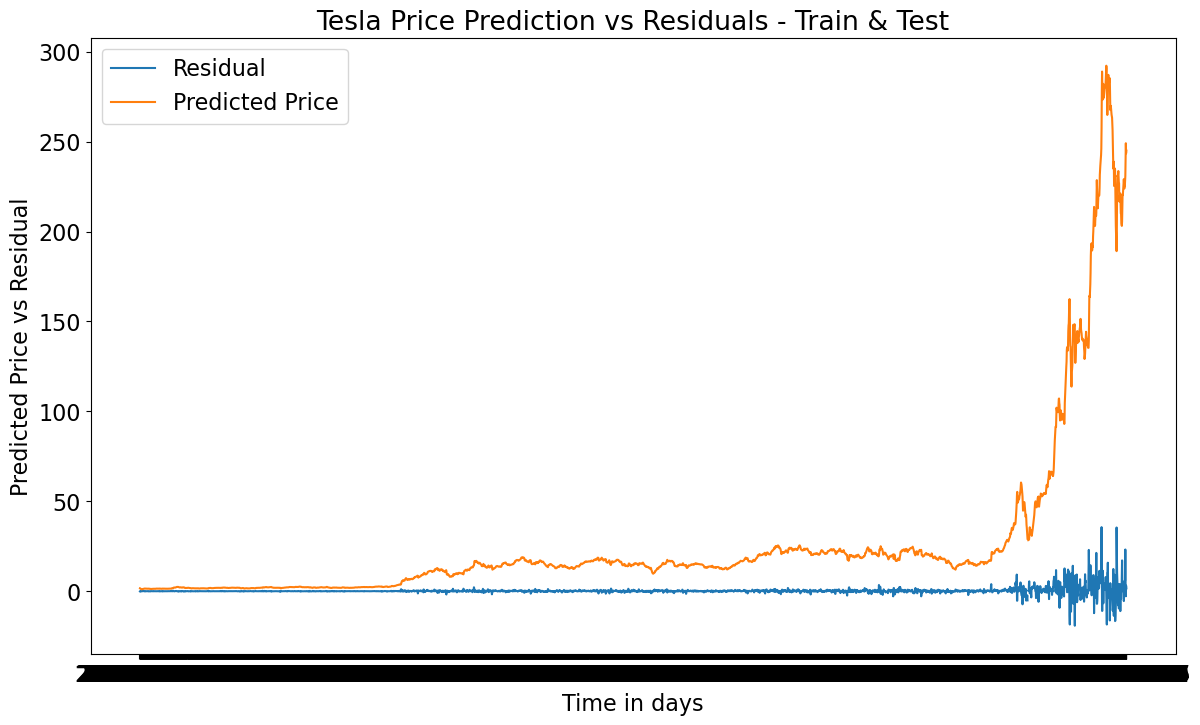

In [59]:
# All Data
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})

plt.plot(tesla['residuals'], label='Residual')
#plt.plot(train_y, label = 'Actual')
plt.plot(tesla['predict'], label = 'Predicted Price')


plt.xlabel('Time in days')
plt.ylabel('Predicted Price vs Residual')
plt.title('Tesla Price Prediction vs Residuals - Train & Test')
plt.legend()
plt.show()

In [60]:
tesla

Value     predict  residuals
Date                                         
2010-06-29    1.592667         NaN        NaN
2010-06-30    1.588667         NaN        NaN
2010-07-01    1.464000    1.606891  -0.142891
2010-07-02    1.280000    1.561289  -0.281289
2010-07-03    1.228500    1.416622  -0.188122
...                ...         ...        ...
2021-04-13  254.106674  230.927933  23.178741
2021-04-14  244.076660  239.857727   4.218933
2021-04-15  246.283340  249.126816  -2.843475
2021-04-16  246.593338  243.509659   3.083679
2021-04-17  246.593338  245.028625   1.564713

[3946 rows x 3 columns]

In [62]:
tesla = tesla.rename(columns={'Value': 'Adj Close'})

In [63]:
tesla.to_csv('tesla_all_dates_prediction_residuals.csv')